In [1]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime
from sklearn.ensemble import IsolationForest
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import warnings 
warnings.filterwarnings("ignore")
import pickle

/Users/subikshaa/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/subikshaa/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/subikshaa/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/subikshaa/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

In [24]:
# Read pre-processed data
top_page_df = pd.read_csv('Preprocessed_data/final_data.csv')
top_page_df = top_page_df.set_index('Date')

In [26]:
# Convert dataset into suitable form to train the model
train = top_page_df[:'2016-09']
test = top_page_df['2016-10':]

def transform_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 7

X_train, y_train = transform_dataset(train, train.Views, time_steps)
X_test, y_test = transform_dataset(test, test.Views, time_steps)

## LSTM

In [27]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.RMSprop()
)

In [28]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 378 samples, validate on 43 samples
Epoch 1/20
378/378 [==============================] - 1s 3ms/sample - loss: 137.4239 - val_loss: 64.4879
Epoch 2/20
378/378 [==============================] - 0s 432us/sample - loss: 13.3225 - val_loss: 23.4985
Epoch 3/20
378/378 [==============================] - 0s 424us/sample - loss: 3.8077 - val_loss: 13.6965
Epoch 4/20
378/378 [==============================] - 0s 444us/sample - loss: 2.5473 - val_loss: 10.9317
Epoch 5/20
378/378 [==============================] - 0s 434us/sample - loss: 2.3783 - val_loss: 10.1192
Epoch 6/20
378/378 [==============================] - 0s 424us/sample - loss: 2.3542 - val_loss: 9.7383
Epoch 7/20
378/378 [==============================] - 0s 432us/sample - loss: 2.2620 - val_loss: 9.2423
Epoch 8/20
378/378 [==============================] - 0s 437us/sample - loss: 2.2058 - val_loss: 8.8267
Epoch 9/20
378/378 [==============================] - 0s 424us/sample - loss: 2.1622 - val_loss: 8.4865
Epoch 10/20
3

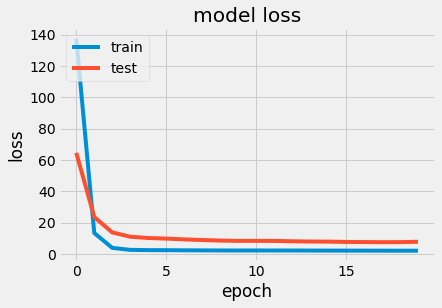

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# Forecasting using test data
y_pred = model.predict(X_test)

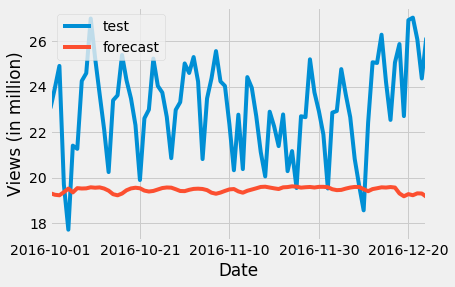

In [31]:
fig,ax=plt.subplots()
pd.DataFrame({'Date':test.index[:y_test.shape[0]],'Views':y_test}).plot('Date',ax=ax)
pd.DataFrame({'Date':test.index[:y_pred.shape[0]],'Views':y_pred.flatten()}).plot('Date',ax=ax)
plt.legend(['test', 'forecast'], loc='upper left')
plt.ylabel('Views (in million)')
plt.show()

In [32]:
print('RMSE:'+str(np.sqrt(np.mean(np.square(y_pred.flatten() - y_test)))))

RMSE:4.173544036830901
